# TLRY Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_tlry = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/tlry.csv')
df_tlry['Date'] = pd.to_datetime(df_tlry['Date'])
df_tlry = df_tlry.set_index('Date')
df_tlry = df_tlry.rename(columns={'Open':'tlry_Open', 'High':'tlry_High', 'Low':'tlry_Low', 'Close':'tlry_Close', 'Volume':'tlry_Volume'})
df_tlry = df_tlry.drop('Adj Close', axis=1)
df_tlry['tlry_prev_close'] = df_tlry['tlry_Close'].shift(1)
df_tlry['tlry_next_close'] = df_tlry['tlry_Close'].shift(-1)
df_tlry['tlry_diff'] = df_tlry['tlry_Close'].diff()
df_tlry['tlry_%change'] = df_tlry['tlry_Close'].pct_change()
df_tlry['tlry_5day_avg_close'] = df_tlry['tlry_Close'].rolling(5).mean()
df_tlry['tlry_5day_avg_diff'] = df_tlry['tlry_diff'].rolling(5).mean()
df_tlry['tlry_10day_avg_close'] = df_tlry['tlry_Close'].rolling(10).mean()
df_tlry['tlry_10day_avg_diff'] = df_tlry['tlry_diff'].rolling(10).mean()

In [4]:
df_tlry

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-03   5.150000   5.400000   5.140000    5.180000     17594700   
2022-05-04   5.150000   5.350000   4.960000    5.300000     23131200   
2022-05-05   5.160000   5.240000   4.840000    4.890000     23661400   
2022-05-06   4.860000   4.890000   4.580000    4.740000     25707300   
2022-05-09   4.650000   4.660000   4.360000    4.390000     27649400   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19              NaN        29.770000        NaN           NaN   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-03         5.230000         5.300000  -0.050000     -0.009560   
2022-05-04         5.180000         4.890000   0.120000      0.023166   
2022-05-05         5.300000         4.740000  -0.410000     -0.077358   
2022-05-06         4.890000         4.390000  -0.150000     -0.030675   
2022-05-09         4.740000              NaN  -0.350000     -0.073840   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  NaN                 NaN                   NaN   
2018-07-20                  NaN                 NaN                   NaN   
2018-07-23                  NaN                 NaN                   NaN   
2018-07-24                  NaN                 NaN                   NaN   
2018-07-25               26.692                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03                5.102               0.022                 5.177   
2022-05-04                5.160               0.058                 5.166   
2022-05-05                5.116              -0.044                 5.131   
2022-05-06                5.068              -0.048                 5.081   
2022-05-09                4.900              -0.168                 4.990   

            tlry_10day_avg_diff  
Date                             
2018-07-19                  NaN  
2018-07-20                  NaN  
2018-07-23                  NaN  
2018-07-24                  NaN  
2018-07-25                  NaN  
...                         ...  
2022-05-03               -0.065  
2022-05-04               -0.011  
2022-05-05               -0.035  
2022-05-06               -0.050  
2022-05-09               -0.091  

[959 rows x 13 columns]

In [5]:
cut = df_tlry.index.min()
cut

Timestamp('2018-07-19 00:00:00')

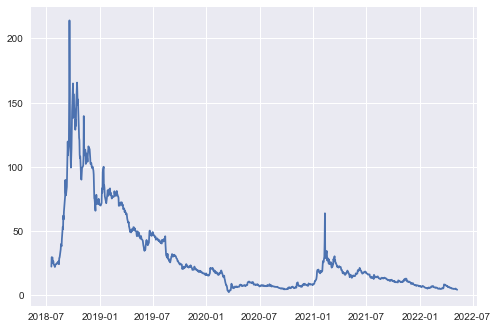

In [6]:
plt.plot(df_tlry['tlry_Close'])

## TLRY and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_tlry, df_dow, on='Date', how='left')
df0

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-03   5.150000   5.400000   5.140000    5.180000     17594700   
2022-05-04   5.150000   5.350000   4.960000    5.300000     23131200   
2022-05-05   5.160000   5.240000   4.840000    4.890000     23661400   
2022-05-06   4.860000   4.890000   4.580000    4.740000     25707300   
2022-05-09   4.650000   4.660000   4.360000    4.390000     27649400   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19              NaN        29.770000        NaN           NaN   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-03         5.230000         5.300000  -0.050000     -0.009560   
2022-05-04         5.180000         4.890000   0.120000      0.023166   
2022-05-05         5.300000         4.740000  -0.410000     -0.077358   
2022-05-06         4.890000         4.390000  -0.150000     -0.030675   
2022-05-09         4.740000              NaN  -0.350000     -0.073840   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  NaN                 NaN                   NaN   
2018-07-20                  NaN                 NaN                   NaN   
2018-07-23                  NaN                 NaN                   NaN   
2018-07-24                  NaN                 NaN                   NaN   
2018-07-25               26.692                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03                5.102               0.022                 5.177   
2022-05-04                5.160               0.058                 5.166   
2022-05-05                5.116              -0.044                 5.131   
2022-05-06                5.068              -0.048                 5.081   
2022-05-09                4.900              -0.168                 4.990   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                  NaN   25139.15   25154.17  25052.62    25064.50   
2018-07-20                  NaN   25041.14   25124.10  24986.35    25058.12   
2018-07-23                  NaN   25036.90   25081.45  24983.33    25044.29   
2018-07-24                  NaN   25092.43   25286.62  25092.43    25241.94   
2018-07-25                  NaN   25183.70   25432.87  25113.55    25414.10   
...                         ...        ...        ...       ...         ...   
2022-05-03               -0.065   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.011   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.035   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.050   32773.88   33055.84  32474.69    32899.37   
2022-05-09               -0.091   32685.17   32685.17  32121.98    32245.70   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                   

In [9]:
df_isna0 = df0.isna()
df_isna0

tlry_Open  tlry_High  tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                  
2018-07-19      False      False     False       False        False   
2018-07-20      False      False     False       False        False   
2018-07-23      False      False     False       False        False   
2018-07-24      False      False     False       False        False   
2018-07-25      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19             True            False       True          True   
2018-07-20            False            False      False         False   
2018-07-23            False            False      False         False   
2018-07-24            False            False      False         False   
2018-07-25            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                 True                True                  True   
2018-07-20                 True                True                  True   
2018-07-23                 True                True                  True   
2018-07-24                 True                True                  True   
2018-07-25                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                 True      False      False     False       False   
2018-07-20                 True      False      False     False       False   
2018-07-23                 True      False      False     False       False   
2018-07-24                 True      False      False     False       False   
2018-07-25                 True      False      False     False       False   
...                         ...        ...        ...       ...         ...   
2022-05-03                False      False      False     False       False   
2022-05-04                False      False      False     False       False   
2022-05-05                False      False      False     False       False   
2022-05-06                False      False      False     False       False   
2022-05-09                False      False      False     False       False   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000                 0.0                   0.0   
2018-07-20                0.000                 0.0                   0.0   
2018-07-23                0.000                 0.0                   0.0   
2018-07-24                0.000                 0.0                   0.0   
2018-07-25               26.692                 0.0                   0.0   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                  0.0   25139.15   25154.17  25052.62    25064.50   
2018-07-20                  0.0   25041.14   25124.10  24986.35    25058.12   
2018-07-23                  0.0   25036.90   25081.45  24983.33    25044.29   
2018-07-24                  0.0   25092.43   25286.62  25092.43    25241.94   
2018-07-25                  0.0   25183.70   25432.87  25113.55    25414.10   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-07-19  285749714.0         25199.29         25058.12    -134.79   
2018-07-20  274084814.0         25064.50         25044.29      -6.38   
2018-07-23  228814553.0         25058.12         25241.94     -13.83   
2018-07-24  274921716.0         25044.29         25414.10     197.65   
2018-07-25  273716533.0         25241.94         25527.07     172.16   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-07-19     -0.005349            25093.490              27.922   
2018-07-20     -0.000255            25101.232               7.742   
2018-07-23     -0.000552            25097.218              -4.014   
2018-07-24      0.007892            25121.628              24.410   
2018-07-25      0.006820            25164.590              42.962   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-07-19             24924.552               70.776  
2018-07-20             24984.716               60.164  
2018-07-23             25011.486               26.770  
2018-07-24             25043.714               32.228  
2018-07-25             25115.079               71.365

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-03   5.150000   5.400000   5.140000    5.180000     17594700   
2022-05-04   5.150000   5.350000   4.960000    5.300000     23131200   
2022-05-05   5.160000   5.240000   4.840000    4.890000     23661400   
2022-05-06   4.860000   4.890000   4.580000    4.740000     25707300   
2022-05-09   4.650000   4.660000   4.360000    4.390000     27649400   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-03         5.230000         5.300000  -0.050000     -0.009560   
2022-05-04         5.180000         4.890000   0.120000      0.023166   
2022-05-05         5.300000         4.740000  -0.410000     -0.077358   
2022-05-06         4.890000         4.390000  -0.150000     -0.030675   
2022-05-09         4.740000         0.000000  -0.350000     -0.073840   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000               0.000                 0.000   
2018-07-20                0.000               0.000                 0.000   
2018-07-23                0.000               0.000                 0.000   
2018-07-24                0.000               0.000                 0.000   
2018-07-25               26.692               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-03                5.102               0.022                 5.177   
2022-05-04                5.160               0.058                 5.166   
2022-05-05                5.116              -0.044                 5.131   
2022-05-06                5.068              -0.048                 5.081   
2022-05-09                4.900              -0.168                 4.990   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                0.000   25139.15   25154.17  25052.62    25064.50   
2018-07-20                0.000   25041.14   25124.10  24986.35    25058.12   
2018-07-23                0.000   25036.90   25081.45  24983.33    25044.29   
2018-07-24                0.000   25092.43   25286.62  25092.43    25241.94   
2018-07-25                0.000   25183.70   25432.87  25113.55    25414.10   
...                         ...        ...        ...       ...         ...   
2022-05-03               -0.065   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.011   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.035   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.050   32773.88   33055.84  32474.69    32899.37   
2022-05-09               -0.091   32685.17   32685.17  32121.98    32245.70   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                   

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tlry_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   
2018-07-24      7   24  2018        3  28.799999  29.430000  25.250000   
2018-07-25      7   25  2018        3  25.309999  27.150000  24.200001   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_next_close  \
Date                                                                    
2018-07-19   22.389999     11934500         0.000000        29.770000   
2018-07-20   29.770000     13938200        22.389999        29.450001   
2018-07-23   29.450001     10042900        29.770000        25.360001   
2018-07-24   25.360001      5524200        29.450001        26.490000   
2018-07-25   26.490000      3844100        25.360001        26.400000   

            tlry_diff  tlry_%change  tlry_5day_avg_close  tlry_5day_avg_diff  \
Date                                                                           
2018-07-19   0.000000      0.000000                0.000                 0.0   
2018-07-20   7.380001      0.329611                0.000                 0.0   
2018-07-23  -0.319999     -0.010749                0.000                 0.0   
2018-07-24  -4.090000     -0.138879                0.000                 0.0   
2018-07-25   1.129999      0.044558               26.692                 0.0   

            tlry_10day_avg_close  tlry_10day_avg_diff  djix_Open  djix_High  \
Date                                                                          
2018-07-19                   0.0                  0.0   25139.15   25154.17   
2018-07-20                   0.0                  0.0   25041.14   25124.10   
2018-07-23                   0.0                  0.0   25036.90   25081.45   
2018-07-24                   0.0                  0.0   25092.43   25286.62   
2018-07-25                   0.0                  0.0   25183.70   25432.87   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-07-19  25052.62    25064.50  285749714.0         25199.29   
2018-07-20  24986.35    25058.12  274084814.0         25064.50   
2018-07-23  24983.33    25044.29  228814553.0         25058.12   
2018-07-24  25092.43    25241.94  274921716.0         25044.29   
2018-07-25  25113.55    25414.10  273716533.0         25241.94   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-07-19         25058.12    -134.79     -0.005349            25093.490   
2018-07-20         25044.29      -6.38     -0.000255            25101.232   
2018-07-23         25241.94     -13.83     -0.000552            25097.218   
2018-07-24         25414.10     197.65      0.007892            25121.628   
2018-07-25         25527.07     172.16      0.006820            25164.590   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-07-19              27.922             24924.552               70.776   
2018-07-20               7.742             24984.716               60.164   
2018-07-23              -4.014             25011.486               26.770   
2018-07-24              24.410             25043.714               32.228   
2018-07-25              42.962             25115.079               71.365   

            tlry_Open_b  tlry_High_b  tlry_Low_b  tlry_Close_b  tlry_Volume_b  \
Date                                                                            
2018-07-19        False        False       False         False          False   
2018-07-20        False        False       False         False          False   

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(958, 56)

In [18]:
n = int(len(df0) * 0.9)
n

862

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

862
96


In [21]:
X_train0 = train0.drop('tlry_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2018-07-19   22.389999     11934500         0.000000   0.000000      0.000000   
2018-07-20   29.770000     13938200        22.389999   7.380001      0.329611   
2018-07-23   29.450001     10042900        29.770000  -0.319999     -0.010749   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  0.0                 0.0                   0.0   
2018-07-20                  0.0                 0.0                   0.0   
2018-07-23                  0.0                 0.0                   0.0   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2018-07-19                  0.0   25139.15   25154.17  25052.62    25064.50   
2018-07-20                  0.0   25041.14   25124.10  24986.35    25058.12   
2018-07-23                  0.0   25036.90   25081.45  24983.33    25044.29   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-07-19  285749714.0         25199.29         25058.12    -134.79   
2018-07-20  274084814.0         25064.50         25044.29      -6.38   
2018-07-23  228814553.0         25058.12         25241.94     -13.83   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-07-19     -0.005349            25093.490              27.922   
2018-07-20     -0.000255            25101.232               7.742   
2018-07-23     -0.000552            25097.218              -4.014   

            djix_10day_avg_close  djix_10day_avg_diff  tlry_Open_b  \
Date                                                                 
2018-07-19             24924.552               70.776        False   
2018-07-20             24984.716               60.164        False   
2018-07-23             25011.486               26.770        False   

            tlry_High_b  tlry_Low_b  tlry_Close_b  tlry_Volume_b  \
Date                                                               
2018-07-19        False       False         False          False   
2018-07-20        False       False         False          False   
2018-07-23        False       False         False          False   

            tlry_prev_close_b  tlry_next_close_b  tlry_diff_b  tlry_%change_b  \
Date                                                                            
2018-07-19               True              False         True            True   
2018-07-20              False              False        False           False   
2018-07-23              False              False        False           False   

            tlry_5day_avg_close_b  tlry_5day_avg_diff_b  \
Date                                                      
2018-07-19                   True                  True   
2018-07-20                   True                  True   
2018-07-23                   True                  True   

            tlry_10day_avg_close_b  tlry_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2018-07-19                    True                   True        False   
2018-07-20                    True                   True        False   
2018-07-23                    True                   Tru

In [22]:
X_train0.shape

(862, 55)

In [23]:
y_train0 = train0['tlry_next_close']
y_train0.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-15    7.88
2021-12-16    7.98
2021-12-17    7.46
Name: tlry_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('tlry_next_close', axis=1)
y_test0 = test0['tlry_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  tlry_Open  tlry_High  tlry_Low  \
Date                                                                    
2021-12-20     12   20  2021        4       7.71       7.83      7.31   
2021-12-21     12   21  2021        4       7.50       7.93      7.47   
2021-12-22     12   22  2021        4       7.75       7.89      7.58   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2021-12-20        7.46     22899900             7.98      -0.52     -0.065163   
2021-12-21        7.85     19972200             7.46       0.39      0.052279   
2021-12-22        7.74     12366300             7.85      -0.11     -0.014013   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2021-12-20                7.902              -0.166                 8.441   
2021-12-21                7.862              -0.040                 8.282   
2021-12-22                7.782              -0.080                 8.095   

            tlry_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2021-12-20               -0.169   35222.12   35222.12  34665.50    34932.16   
2021-12-21               -0.159   35069.50   35508.96  35069.50    35492.70   
2021-12-22               -0.187   35491.71   35764.67  35433.13    35753.89   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-12-20  462936403.0         35365.44         35492.70    -433.28   
2021-12-21  438602980.0         34932.16         35753.89     560.54   
2021-12-22  366038462.0         35492.70         35950.56     261.19   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-12-20     -0.012252            35533.370            -143.758   
2021-12-21      0.016047            35523.074             -10.296   
2021-12-22      0.007359            35488.366             -34.708   

            djix_10day_avg_close  djix_10day_avg_diff  tlry_Open_b  \
Date                                                                 
2021-12-20             35651.766              -29.487        False   
2021-12-21             35629.093              -22.673        False   
2021-12-22             35629.007               -0.086        False   

            tlry_High_b  tlry_Low_b  tlry_Close_b  tlry_Volume_b  \
Date                                                               
2021-12-20        False       False         False          False   
2021-12-21        False       False         False          False   
2021-12-22        False       False         False          False   

            tlry_prev_close_b  tlry_next_close_b  tlry_diff_b  tlry_%change_b  \
Date                                                                            
2021-12-20              False              False        False           False   
2021-12-21              False              False        False           False   
2021-12-22              False              False        False           False   

            tlry_5day_avg_close_b  tlry_5day_avg_diff_b  \
Date                                                      
2021-12-20                  False                 False   
2021-12-21                  False                 False   
2021-12-22                  False                 False   

            tlry_10day_avg_close_b  tlry_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2021-12-20                   False                  False        False   
2021-12-21                   False                  False        False   
2021-12-22                   False                  False    

In [27]:
X_test0.shape

(96, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    4.89
2022-05-05    4.74
2022-05-06    4.39
Name: tlry_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([8.26560265, 8.24358967, 7.65411677, 7.91847319, 8.1003135 ])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

1.1976813681816463


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.9539536708524489


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['tlry_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['tlry_next_close'])

In [36]:
y_test0['tlry_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-02             5.18              3.555119
2022-05-03             5.30              5.148231
2022-05-04             4.89              3.783097
2022-05-05             4.74              3.976424
2022-05-06             4.39              2.801891

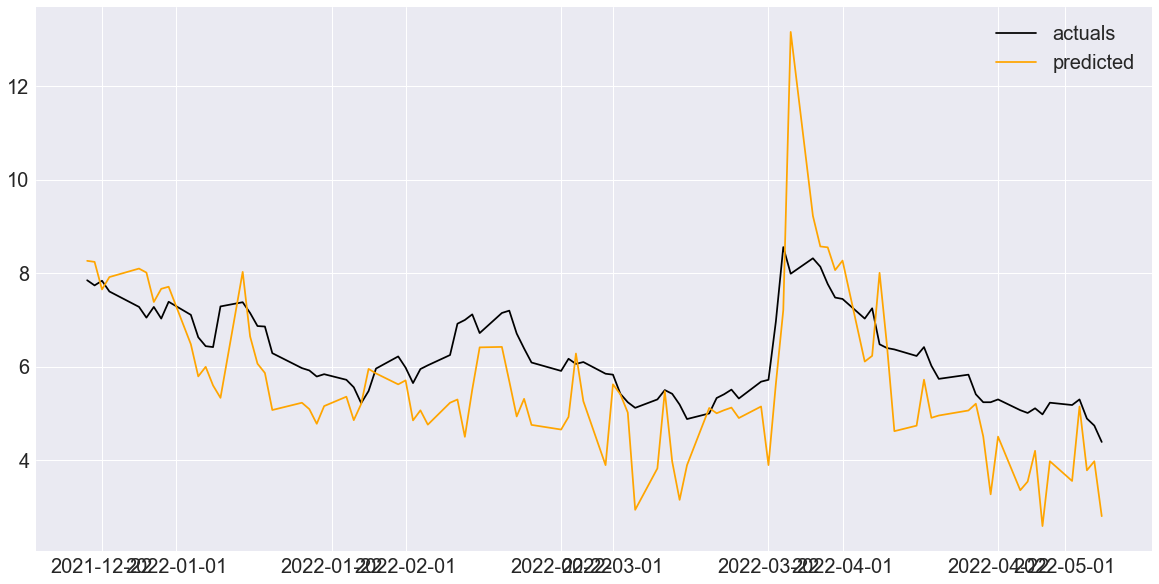

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['tlry_next_close'], color='black')
ax.plot(y_test0['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TLRY and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_tlry, df_etfs, on='Date', how='left')
df1

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-03   5.150000   5.400000   5.140000    5.180000     17594700   
2022-05-04   5.150000   5.350000   4.960000    5.300000     23131200   
2022-05-05   5.160000   5.240000   4.840000    4.890000     23661400   
2022-05-06   4.860000   4.890000   4.580000    4.740000     25707300   
2022-05-09   4.650000   4.660000   4.360000    4.390000     27649400   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19              NaN        29.770000        NaN           NaN   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-03         5.230000         5.300000  -0.050000     -0.009560   
2022-05-04         5.180000         4.890000   0.120000      0.023166   
2022-05-05         5.300000         4.740000  -0.410000     -0.077358   
2022-05-06         4.890000         4.390000  -0.150000     -0.030675   
2022-05-09         4.740000              NaN  -0.350000     -0.073840   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  NaN                 NaN                   NaN   
2018-07-20                  NaN                 NaN                   NaN   
2018-07-23                  NaN                 NaN                   NaN   
2018-07-24                  NaN                 NaN                   NaN   
2018-07-25               26.692                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03                5.102               0.022                 5.177   
2022-05-04                5.160               0.058                 5.166   
2022-05-05                5.116              -0.044                 5.131   
2022-05-06                5.068              -0.048                 5.081   
2022-05-09                4.900              -0.168                 4.990   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  NaN  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  NaN  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  NaN  27.270000  27.929001  27.260000  27.650000   
2018-07-24                  NaN  27.860001  27.900000  26.990000  27.129999   
2018-07-25                  NaN  27.209999  27.379999  26.931000  26.959999   
...                         ...        ...        ...        ...        ...   
2022-05-03               -0.065   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.011   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.035   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.050   8.010000   8.050000   7.750000   7.900000   
2022-05-09               -0.091   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date              

In [41]:
df_isna1 = df1.isna()
df_isna1

tlry_Open  tlry_High  tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                  
2018-07-19      False      False     False       False        False   
2018-07-20      False      False     False       False        False   
2018-07-23      False      False     False       False        False   
2018-07-24      False      False     False       False        False   
2018-07-25      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19             True            False       True          True   
2018-07-20            False            False      False         False   
2018-07-23            False            False      False         False   
2018-07-24            False            False      False         False   
2018-07-25            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                 True                True                  True   
2018-07-20                 True                True                  True   
2018-07-23                 True                True                  True   
2018-07-24                 True                True                  True   
2018-07-25                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            tlry_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2018-07-19                 True    False    False   False     False   
2018-07-20                 True    False    False   False     False   
2018-07-23                 True    False    False   False     False   
2018-07-24                 True    False    False   False     False   
2018-07-25                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-03                False    False    False   False     False   
2022-05-04                False    False    False   False     False   
2022-05-05                False    False    False   False     False   
2022-05-06                False    False    False   False     False   
2022-05-09                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2018-07-19      False          False          False    False

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000                 0.0                   0.0   
2018-07-20                0.000                 0.0                   0.0   
2018-07-23                0.000                 0.0                   0.0   
2018-07-24                0.000                 0.0                   0.0   
2018-07-25               26.692                 0.0                   0.0   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  0.0  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  0.0  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  0.0  27.270000  27.929001  27.260000  27.650000   
2018-07-24                  0.0  27.860001  27.900000  26.990000  27.129999   
2018-07-25                  0.0  27.209999  27.379999  26.931000  26.959999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-07-19      92800      27.860001      27.260000 -0.420000   -0.015075   
2018-07-20     239300      27.440001      27.650000 -0.180001   -0.006560   
2018-07-23     113100      27.260000      27.129999  0.390000    0.014307   
2018-07-24     289200      27.650000      26.959999 -0.520001   -0.018807   
2018-07-25     217300      27.129999      26.400000 -0.170000   -0.006266   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-07-19          27.884001            -0.354              28.688   
2018-07-20          27.570001            -0.314              28.436   
2018-07-23          27.528000            -0.042              28.238   
2018-07-24          27.468000            -0.060              28.002   
2018-07-25          27.288000            -0.180              27.763   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-07-19             -0.211        0.0        0.0       0.0         0.0   
2018-07-20             -0.252        0.0        0.0       0.0         0.0   
2018-07-23             -0.198        0.0        0.0       0.0         0.0   
2018-07-24             -0.236        0.0        0.0       0.0         0.0   
2018-07-25             -0.239        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-07-19          0.0              0.0              0.0        0.0   
2018-07-20          0.0              0.0              0.0        0.0   
2018-07-23          0.0            

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-03   5.150000   5.400000   5.140000    5.180000     17594700   
2022-05-04   5.150000   5.350000   4.960000    5.300000     23131200   
2022-05-05   5.160000   5.240000   4.840000    4.890000     23661400   
2022-05-06   4.860000   4.890000   4.580000    4.740000     25707300   
2022-05-09   4.650000   4.660000   4.360000    4.390000     27649400   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-03         5.230000         5.300000  -0.050000     -0.009560   
2022-05-04         5.180000         4.890000   0.120000      0.023166   
2022-05-05         5.300000         4.740000  -0.410000     -0.077358   
2022-05-06         4.890000         4.390000  -0.150000     -0.030675   
2022-05-09         4.740000         0.000000  -0.350000     -0.073840   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000               0.000                 0.000   
2018-07-20                0.000               0.000                 0.000   
2018-07-23                0.000               0.000                 0.000   
2018-07-24                0.000               0.000                 0.000   
2018-07-25               26.692               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-03                5.102               0.022                 5.177   
2022-05-04                5.160               0.058                 5.166   
2022-05-05                5.116              -0.044                 5.131   
2022-05-06                5.068              -0.048                 5.081   
2022-05-09                4.900              -0.168                 4.990   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                0.000  27.650000  27.839001  27.400999  27.440001   
2018-07-20                0.000  27.450001  27.704000  27.219999  27.260000   
2018-07-23                0.000  27.270000  27.929001  27.260000  27.650000   
2018-07-24                0.000  27.860001  27.900000  26.990000  27.129999   
2018-07-25                0.000  27.209999  27.379999  26.931000  26.959999   
...                         ...        ...        ...        ...        ...   
2022-05-03               -0.065   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.011   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.035   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.050   8.010000   8.050000   7.750000   7.900000   
2022-05-09               -0.091   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date              

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tlry_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   
2018-07-24      7   24  2018        3  28.799999  29.430000  25.250000   
2018-07-25      7   25  2018        3  25.309999  27.150000  24.200001   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   5.150000   5.400000   5.140000   
2022-05-04      5    4  2022        2   5.150000   5.350000   4.960000   
2022-05-05      5    5  2022        2   5.160000   5.240000   4.840000   
2022-05-06      5    6  2022        2   4.860000   4.890000   4.580000   
2022-05-09      5    9  2022        2   4.650000   4.660000   4.360000   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_next_close  \
Date                                                                    
2018-07-19   22.389999     11934500         0.000000        29.770000   
2018-07-20   29.770000     13938200        22.389999        29.450001   
2018-07-23   29.450001     10042900        29.770000        25.360001   
2018-07-24   25.360001      5524200        29.450001        26.490000   
2018-07-25   26.490000      3844100        25.360001        26.400000   
...                ...          ...              ...              ...   
2022-05-03    5.180000     17594700         5.230000         5.300000   
2022-05-04    5.300000     23131200         5.180000         4.890000   
2022-05-05    4.890000     23661400         5.300000         4.740000   
2022-05-06    4.740000     25707300         4.890000         4.390000   
2022-05-09    4.390000     27649400         4.740000         0.000000   

            tlry_diff  tlry_%change  tlry_5day_avg_close  tlry_5day_avg_diff  \
Date                                                                           
2018-07-19   0.000000      0.000000                0.000               0.000   
2018-07-20   7.380001      0.329611                0.000               0.000   
2018-07-23  -0.319999     -0.010749                0.000               0.000   
2018-07-24  -4.090000     -0.138879                0.000               0.000   
2018-07-25   1.129999      0.044558               26.692               0.000   
...               ...           ...                  ...                 ...   
2022-05-03  -0.050000     -0.009560                5.102               0.022   
2022-05-04   0.120000      0.023166                5.160               0.058   
2022-05-05  -0.410000     -0.077358                5.116              -0.044   
2022-05-06  -0.150000     -0.030675                5.068              -0.048   
2022-05-09  -0.350000     -0.073840                4.900              -0.168   

            tlry_10day_avg_close  tlry_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2018-07-19                 0.000                0.000  27.650000  27.839001   
2018-07-20                 0.000                0.000  27.450001  27.704000   
2018-07-23                 0.000                0.000  27.270000  27.929001   
2018-07-24                 0.000                0.000  27.860001  27.900000   
2018-07-25                 0.000                0.000  27.209999  27.379999   
...                          ...                  ...        ...        ...   
2022-05-03                 5.177               -0.065   8.340000   8.470000   
2022-05-04                 5.166               -0.011   8.340000   8.590000   
2022-05-05                 5.131               -0.035   8.500000   8.508000   
2022-05-06                 5.081               -0.050   8.010000   8.050000   
2022-05-09                 4.990               -0.091   7.790000   7.800000   

               mj_Low   mj_Clo

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

862

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

862
96


In [52]:
X_train1 = train1.drop('tlry_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2018-07-19   22.389999     11934500         0.000000   0.000000      0.000000   
2018-07-20   29.770000     13938200        22.389999   7.380001      0.329611   
2018-07-23   29.450001     10042900        29.770000  -0.319999     -0.010749   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  0.0                 0.0                   0.0   
2018-07-20                  0.0                 0.0                   0.0   
2018-07-23                  0.0                 0.0                   0.0   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  0.0  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  0.0  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  0.0  27.270000  27.929001  27.260000  27.650000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-07-19      92800      27.860001      27.260000 -0.420000   -0.015075   
2018-07-20     239300      27.440001      27.650000 -0.180001   -0.006560   
2018-07-23     113100      27.260000      27.129999  0.390000    0.014307   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-07-19          27.884001            -0.354              28.688   
2018-07-20          27.570001            -0.314              28.436   
2018-07-23          27.528000            -0.042              28.238   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-07-19             -0.211        0.0        0.0       0.0         0.0   
2018-07-20             -0.252        0.0        0.0       0.0         0.0   
2018-07-23             -0.198        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-07-19          0.0              0.0              0.0        0.0   
2018-07-20          0.0              0.0              0.0        0.0   
2018-07-23          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2018-07-19           0.0                  0.0                 0.0   
2018-07-20           0.0                  0.0                 0.0   
2018-07-23           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2018-07-19                   0.0                  0.0        0.0        0.0   
2018-07-20                   0.0                  0.0        0.0        0.0   
2018-07-23                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2018-07-19       0.0         0.0          0.0              0.0   
2018-07-20       0.0    

In [53]:
X_train1.shape

(862, 159)

In [54]:
y_train1 = train1['tlry_next_close']
y_train1.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-15    7.88
2021-12-16    7.98
2021-12-17    7.46
Name: tlry_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('tlry_next_close', axis=1)
y_test1 = test1['tlry_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  tlry_Open  tlry_High  tlry_Low  \
Date                                                                    
2021-12-20     12   20  2021        4       7.71       7.83      7.31   
2021-12-21     12   21  2021        4       7.50       7.93      7.47   
2021-12-22     12   22  2021        4       7.75       7.89      7.58   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2021-12-20        7.46     22899900             7.98      -0.52     -0.065163   
2021-12-21        7.85     19972200             7.46       0.39      0.052279   
2021-12-22        7.74     12366300             7.85      -0.11     -0.014013   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2021-12-20                7.902              -0.166                 8.441   
2021-12-21                7.862              -0.040                 8.282   
2021-12-22                7.782              -0.080                 8.095   

            tlry_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-12-20               -0.169    11.11    11.23  10.930     11.08   
2021-12-21               -0.159    11.16    11.53  11.153     11.49   
2021-12-22               -0.187    11.40    11.50  11.245     11.45   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-12-20    1323500          11.48          11.49    -0.40   -0.034843   
2021-12-21    1215500          11.08          11.45     0.41    0.037004   
2021-12-22     895600          11.49          11.78    -0.04   -0.003481   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-12-20             11.256            -0.094              11.513   
2021-12-21             11.314             0.058              11.467   
2021-12-22             11.344             0.030              11.393   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2021-12-20             -0.043     23.816     23.816     23.08   23.270000   
2021-12-21             -0.046     23.350     23.750     23.35   23.610001   
2021-12-22             -0.074     23.500     24.660     23.34   24.559999   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-12-20    1241200.0        24.100000        23.610001  -0.830000   
2021-12-21     851500.0        23.270000        24.559999   0.340001   
2021-12-22    1138400.0        23.610001        25.360001   0.949998   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-12-20     -0.034440            24.086000              -0.322   
2021-12-21      0.014611            23.924001              -0.162   
2021-12-22      0.040237            23.930000               0.006   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-12-20                24.986               -0.167      13.00      13.00   
2021-12-21                24.813               -0.173      12.69      13.10   
2021-12-22                24.589               -0.224      12.99      13.37   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-12-20    12.560       12.66     182000.0            13.19   
2021-12-21    12.690       13.06     111000.0            12.66   
2021-12-

In [58]:
X_test1.shape

(96, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    4.89
2022-05-05    4.74
2022-05-06    4.39
Name: tlry_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([ 9.63566129,  8.41004805, 11.18983683,  8.26551999,  6.27864087])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

1.9603216191480581


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

1.719778806125299


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['tlry_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['tlry_next_close'])

In [66]:
y_test1['tlry_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-02             5.18              3.750505
2022-05-03             5.30              4.919810
2022-05-04             4.89              2.321180
2022-05-05             4.74              3.037599
2022-05-06             4.39              1.963449

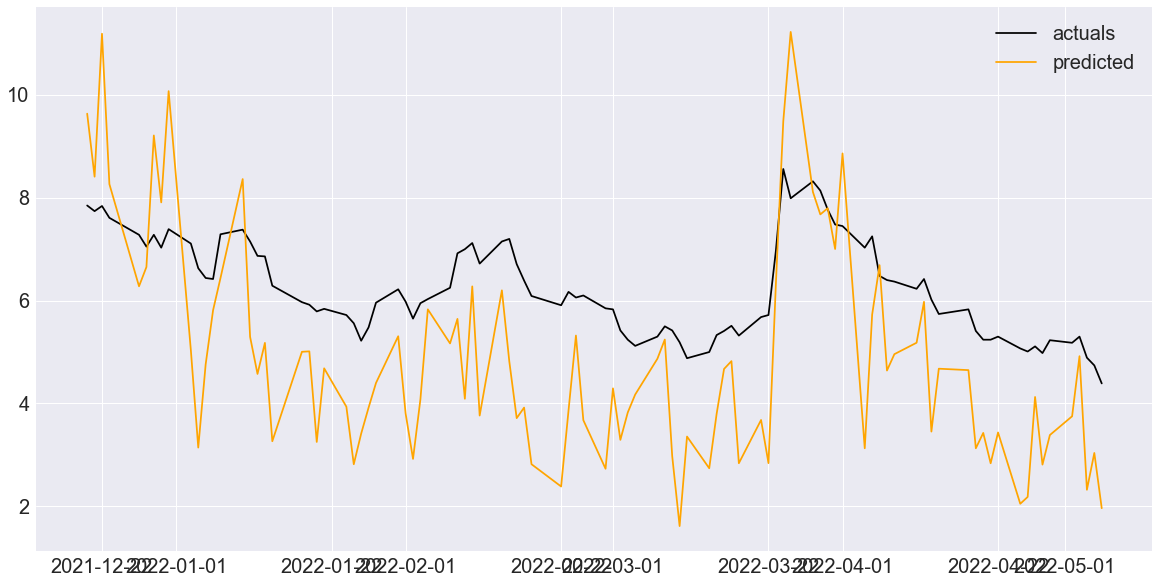

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['tlry_next_close'], color='black')
ax.plot(y_test1['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TLRY, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_tlry, df_etfs_dow, on='Date', how='left')
df2

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-03   5.150000   5.400000   5.140000    5.180000     17594700   
2022-05-04   5.150000   5.350000   4.960000    5.300000     23131200   
2022-05-05   5.160000   5.240000   4.840000    4.890000     23661400   
2022-05-06   4.860000   4.890000   4.580000    4.740000     25707300   
2022-05-09   4.650000   4.660000   4.360000    4.390000     27649400   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19              NaN        29.770000        NaN           NaN   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-03         5.230000         5.300000  -0.050000     -0.009560   
2022-05-04         5.180000         4.890000   0.120000      0.023166   
2022-05-05         5.300000         4.740000  -0.410000     -0.077358   
2022-05-06         4.890000         4.390000  -0.150000     -0.030675   
2022-05-09         4.740000              NaN  -0.350000     -0.073840   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  NaN                 NaN                   NaN   
2018-07-20                  NaN                 NaN                   NaN   
2018-07-23                  NaN                 NaN                   NaN   
2018-07-24                  NaN                 NaN                   NaN   
2018-07-25               26.692                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03                5.102               0.022                 5.177   
2022-05-04                5.160               0.058                 5.166   
2022-05-05                5.116              -0.044                 5.131   
2022-05-06                5.068              -0.048                 5.081   
2022-05-09                4.900              -0.168                 4.990   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  NaN  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  NaN  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  NaN  27.270000  27.929001  27.260000  27.650000   
2018-07-24                  NaN  27.860001  27.900000  26.990000  27.129999   
2018-07-25                  NaN  27.209999  27.379999  26.931000  26.959999   
...                         ...        ...        ...        ...        ...   
2022-05-03               -0.065   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.011   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.035   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.050   8.010000   8.050000   7.750000   7.900000   
2022-05-09               -0.091   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date              

In [71]:
df_isna2 = df2.isna()
df_isna2

tlry_Open  tlry_High  tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                  
2018-07-19      False      False     False       False        False   
2018-07-20      False      False     False       False        False   
2018-07-23      False      False     False       False        False   
2018-07-24      False      False     False       False        False   
2018-07-25      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19             True            False       True          True   
2018-07-20            False            False      False         False   
2018-07-23            False            False      False         False   
2018-07-24            False            False      False         False   
2018-07-25            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                 True                True                  True   
2018-07-20                 True                True                  True   
2018-07-23                 True                True                  True   
2018-07-24                 True                True                  True   
2018-07-25                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            tlry_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2018-07-19                 True    False    False   False     False   
2018-07-20                 True    False    False   False     False   
2018-07-23                 True    False    False   False     False   
2018-07-24                 True    False    False   False     False   
2018-07-25                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-03                False    False    False   False     False   
2022-05-04                False    False    False   False     False   
2022-05-05                False    False    False   False     False   
2022-05-06                False    False    False   False     False   
2022-05-09                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2018-07-19      False          False          False    False

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000                 0.0                   0.0   
2018-07-20                0.000                 0.0                   0.0   
2018-07-23                0.000                 0.0                   0.0   
2018-07-24                0.000                 0.0                   0.0   
2018-07-25               26.692                 0.0                   0.0   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  0.0  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  0.0  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  0.0  27.270000  27.929001  27.260000  27.650000   
2018-07-24                  0.0  27.860001  27.900000  26.990000  27.129999   
2018-07-25                  0.0  27.209999  27.379999  26.931000  26.959999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-07-19      92800      27.860001      27.260000 -0.420000   -0.015075   
2018-07-20     239300      27.440001      27.650000 -0.180001   -0.006560   
2018-07-23     113100      27.260000      27.129999  0.390000    0.014307   
2018-07-24     289200      27.650000      26.959999 -0.520001   -0.018807   
2018-07-25     217300      27.129999      26.400000 -0.170000   -0.006266   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-07-19          27.884001            -0.354              28.688   
2018-07-20          27.570001            -0.314              28.436   
2018-07-23          27.528000            -0.042              28.238   
2018-07-24          27.468000            -0.060              28.002   
2018-07-25          27.288000            -0.180              27.763   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-07-19             -0.211        0.0        0.0       0.0         0.0   
2018-07-20             -0.252        0.0        0.0       0.0         0.0   
2018-07-23             -0.198        0.0        0.0       0.0         0.0   
2018-07-24             -0.236        0.0        0.0       0.0         0.0   
2018-07-25             -0.239        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-07-19          0.0              0.0              0.0        0.0   
2018-07-20          0.0              0.0              0.0        0.0   
2018-07-23          0.0            

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

tlry_Open  tlry_High   tlry_Low  tlry_Close  tlry_Volume  \
Date                                                                   
2018-07-19  23.049999  24.000000  20.100000   22.389999     11934500   
2018-07-20  24.250000  31.799999  23.500000   29.770000     13938200   
2018-07-23  33.480000  34.099998  29.309999   29.450001     10042900   
2018-07-24  28.799999  29.430000  25.250000   25.360001      5524200   
2018-07-25  25.309999  27.150000  24.200001   26.490000      3844100   
...               ...        ...        ...         ...          ...   
2022-05-03   5.150000   5.400000   5.140000    5.180000     17594700   
2022-05-04   5.150000   5.350000   4.960000    5.300000     23131200   
2022-05-05   5.160000   5.240000   4.840000    4.890000     23661400   
2022-05-06   4.860000   4.890000   4.580000    4.740000     25707300   
2022-05-09   4.650000   4.660000   4.360000    4.390000     27649400   

            tlry_prev_close  tlry_next_close  tlry_diff  tlry_%change  \
Date                                                                    
2018-07-19         0.000000        29.770000   0.000000      0.000000   
2018-07-20        22.389999        29.450001   7.380001      0.329611   
2018-07-23        29.770000        25.360001  -0.319999     -0.010749   
2018-07-24        29.450001        26.490000  -4.090000     -0.138879   
2018-07-25        25.360001        26.400000   1.129999      0.044558   
...                     ...              ...        ...           ...   
2022-05-03         5.230000         5.300000  -0.050000     -0.009560   
2022-05-04         5.180000         4.890000   0.120000      0.023166   
2022-05-05         5.300000         4.740000  -0.410000     -0.077358   
2022-05-06         4.890000         4.390000  -0.150000     -0.030675   
2022-05-09         4.740000         0.000000  -0.350000     -0.073840   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                0.000               0.000                 0.000   
2018-07-20                0.000               0.000                 0.000   
2018-07-23                0.000               0.000                 0.000   
2018-07-24                0.000               0.000                 0.000   
2018-07-25               26.692               0.000                 0.000   
...                         ...                 ...                   ...   
2022-05-03                5.102               0.022                 5.177   
2022-05-04                5.160               0.058                 5.166   
2022-05-05                5.116              -0.044                 5.131   
2022-05-06                5.068              -0.048                 5.081   
2022-05-09                4.900              -0.168                 4.990   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                0.000  27.650000  27.839001  27.400999  27.440001   
2018-07-20                0.000  27.450001  27.704000  27.219999  27.260000   
2018-07-23                0.000  27.270000  27.929001  27.260000  27.650000   
2018-07-24                0.000  27.860001  27.900000  26.990000  27.129999   
2018-07-25                0.000  27.209999  27.379999  26.931000  26.959999   
...                         ...        ...        ...        ...        ...   
2022-05-03               -0.065   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.011   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.035   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.050   8.010000   8.050000   7.750000   7.900000   
2022-05-09               -0.091   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date              

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tlry_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   
2018-07-24      7   24  2018        3  28.799999  29.430000  25.250000   
2018-07-25      7   25  2018        3  25.309999  27.150000  24.200001   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   5.150000   5.400000   5.140000   
2022-05-04      5    4  2022        2   5.150000   5.350000   4.960000   
2022-05-05      5    5  2022        2   5.160000   5.240000   4.840000   
2022-05-06      5    6  2022        2   4.860000   4.890000   4.580000   
2022-05-09      5    9  2022        2   4.650000   4.660000   4.360000   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_next_close  \
Date                                                                    
2018-07-19   22.389999     11934500         0.000000        29.770000   
2018-07-20   29.770000     13938200        22.389999        29.450001   
2018-07-23   29.450001     10042900        29.770000        25.360001   
2018-07-24   25.360001      5524200        29.450001        26.490000   
2018-07-25   26.490000      3844100        25.360001        26.400000   
...                ...          ...              ...              ...   
2022-05-03    5.180000     17594700         5.230000         5.300000   
2022-05-04    5.300000     23131200         5.180000         4.890000   
2022-05-05    4.890000     23661400         5.300000         4.740000   
2022-05-06    4.740000     25707300         4.890000         4.390000   
2022-05-09    4.390000     27649400         4.740000         0.000000   

            tlry_diff  tlry_%change  tlry_5day_avg_close  tlry_5day_avg_diff  \
Date                                                                           
2018-07-19   0.000000      0.000000                0.000               0.000   
2018-07-20   7.380001      0.329611                0.000               0.000   
2018-07-23  -0.319999     -0.010749                0.000               0.000   
2018-07-24  -4.090000     -0.138879                0.000               0.000   
2018-07-25   1.129999      0.044558               26.692               0.000   
...               ...           ...                  ...                 ...   
2022-05-03  -0.050000     -0.009560                5.102               0.022   
2022-05-04   0.120000      0.023166                5.160               0.058   
2022-05-05  -0.410000     -0.077358                5.116              -0.044   
2022-05-06  -0.150000     -0.030675                5.068              -0.048   
2022-05-09  -0.350000     -0.073840                4.900              -0.168   

            tlry_10day_avg_close  tlry_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2018-07-19                 0.000                0.000  27.650000  27.839001   
2018-07-20                 0.000                0.000  27.450001  27.704000   
2018-07-23                 0.000                0.000  27.270000  27.929001   
2018-07-24                 0.000                0.000  27.860001  27.900000   
2018-07-25                 0.000                0.000  27.209999  27.379999   
...                          ...                  ...        ...        ...   
2022-05-03                 5.177               -0.065   8.340000   8.470000   
2022-05-04                 5.166               -0.011   8.340000   8.590000   
2022-05-05                 5.131               -0.035   8.500000   8.508000   
2022-05-06                 5.081               -0.050   8.010000   8.050000   
2022-05-09                 4.990               -0.091   7.790000   7.800000   

               mj_Low   mj_Clo

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

862

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

862
96


In [82]:
X_train2 = train2.drop('tlry_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  tlry_Open  tlry_High   tlry_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  23.049999  24.000000  20.100000   
2018-07-20      7   20  2018        3  24.250000  31.799999  23.500000   
2018-07-23      7   23  2018        3  33.480000  34.099998  29.309999   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2018-07-19   22.389999     11934500         0.000000   0.000000      0.000000   
2018-07-20   29.770000     13938200        22.389999   7.380001      0.329611   
2018-07-23   29.450001     10042900        29.770000  -0.319999     -0.010749   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2018-07-19                  0.0                 0.0                   0.0   
2018-07-20                  0.0                 0.0                   0.0   
2018-07-23                  0.0                 0.0                   0.0   

            tlry_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2018-07-19                  0.0  27.650000  27.839001  27.400999  27.440001   
2018-07-20                  0.0  27.450001  27.704000  27.219999  27.260000   
2018-07-23                  0.0  27.270000  27.929001  27.260000  27.650000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-07-19      92800      27.860001      27.260000 -0.420000   -0.015075   
2018-07-20     239300      27.440001      27.650000 -0.180001   -0.006560   
2018-07-23     113100      27.260000      27.129999  0.390000    0.014307   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-07-19          27.884001            -0.354              28.688   
2018-07-20          27.570001            -0.314              28.436   
2018-07-23          27.528000            -0.042              28.238   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-07-19             -0.211        0.0        0.0       0.0         0.0   
2018-07-20             -0.252        0.0        0.0       0.0         0.0   
2018-07-23             -0.198        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-07-19          0.0              0.0              0.0        0.0   
2018-07-20          0.0              0.0              0.0        0.0   
2018-07-23          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2018-07-19           0.0                  0.0                 0.0   
2018-07-20           0.0                  0.0                 0.0   
2018-07-23           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2018-07-19                   0.0                  0.0        0.0        0.0   
2018-07-20                   0.0                  0.0        0.0        0.0   
2018-07-23                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2018-07-19       0.0         0.0          0.0              0.0   
2018-07-20       0.0    

In [83]:
X_train2.shape

(862, 185)

In [84]:
y_train2 = train2['tlry_next_close']
y_train2.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-15    7.88
2021-12-16    7.98
2021-12-17    7.46
Name: tlry_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('tlry_next_close', axis=1)
y_test2 = test2['tlry_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  tlry_Open  tlry_High  tlry_Low  \
Date                                                                    
2021-12-20     12   20  2021        4       7.71       7.83      7.31   
2021-12-21     12   21  2021        4       7.50       7.93      7.47   
2021-12-22     12   22  2021        4       7.75       7.89      7.58   

            tlry_Close  tlry_Volume  tlry_prev_close  tlry_diff  tlry_%change  \
Date                                                                            
2021-12-20        7.46     22899900             7.98      -0.52     -0.065163   
2021-12-21        7.85     19972200             7.46       0.39      0.052279   
2021-12-22        7.74     12366300             7.85      -0.11     -0.014013   

            tlry_5day_avg_close  tlry_5day_avg_diff  tlry_10day_avg_close  \
Date                                                                        
2021-12-20                7.902              -0.166                 8.441   
2021-12-21                7.862              -0.040                 8.282   
2021-12-22                7.782              -0.080                 8.095   

            tlry_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-12-20               -0.169    11.11    11.23  10.930     11.08   
2021-12-21               -0.159    11.16    11.53  11.153     11.49   
2021-12-22               -0.187    11.40    11.50  11.245     11.45   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-12-20    1323500          11.48          11.49    -0.40   -0.034843   
2021-12-21    1215500          11.08          11.45     0.41    0.037004   
2021-12-22     895600          11.49          11.78    -0.04   -0.003481   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-12-20             11.256            -0.094              11.513   
2021-12-21             11.314             0.058              11.467   
2021-12-22             11.344             0.030              11.393   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2021-12-20             -0.043     23.816     23.816     23.08   23.270000   
2021-12-21             -0.046     23.350     23.750     23.35   23.610001   
2021-12-22             -0.074     23.500     24.660     23.34   24.559999   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-12-20    1241200.0        24.100000        23.610001  -0.830000   
2021-12-21     851500.0        23.270000        24.559999   0.340001   
2021-12-22    1138400.0        23.610001        25.360001   0.949998   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-12-20     -0.034440            24.086000              -0.322   
2021-12-21      0.014611            23.924001              -0.162   
2021-12-22      0.040237            23.930000               0.006   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-12-20                24.986               -0.167      13.00      13.00   
2021-12-21                24.813               -0.173      12.69      13.10   
2021-12-22                24.589               -0.224      12.99      13.37   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-12-20    12.560       12.66     182000.0            13.19   
2021-12-21    12.690       13.06     111000.0            12.66   
2021-12-

In [88]:
X_test2.shape

(96, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    4.89
2022-05-05    4.74
2022-05-06    4.39
Name: tlry_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([ 9.78401167,  8.33250565, 10.77725083,  7.71274451,  6.54757973])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

1.6993782434422042


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

1.4805303700386532


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['tlry_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['tlry_next_close'])

In [96]:
y_test2['tlry_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-02             5.18              3.673337
2022-05-03             5.30              4.231851
2022-05-04             4.89              3.204748
2022-05-05             4.74              3.315720
2022-05-06             4.39              2.680080

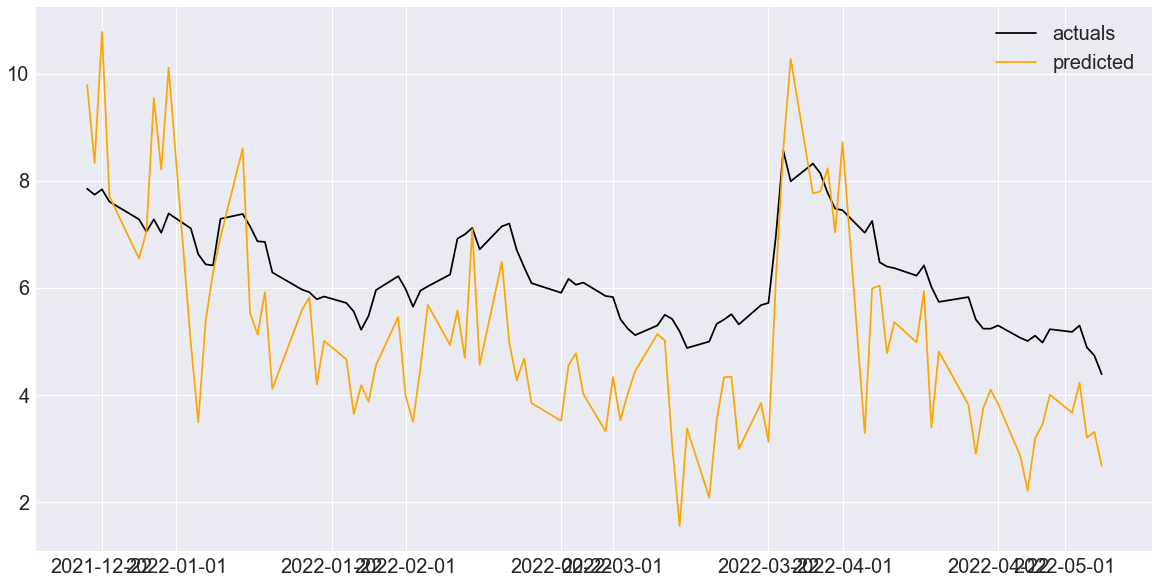

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['tlry_next_close'], color='black')
ax.plot(y_test2['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TLRY target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  26.170000  26.670000  25.350000   
2018-07-20      7   20  2018        3  25.180000  26.000000  24.209999   
2018-07-23      7   23  2018        3  24.430000  26.299999  24.400000   
2018-07-24      7   24  2018        3  26.290001  26.290001  24.360001   
2018-07-25      7   25  2018        3  24.750000  25.860001  24.750000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   
2018-07-24  25.200001     3700000       25.650000       25.680000 -0.449999   
2018-07-25  25.680000     1823300       25.200001       25.139999  0.479999   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   
2018-07-24    -0.017544              25.438             -0.252   
2018-07-25     0.019048              25.252             -0.186   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700              0.152   
2022-05-04     0.100660               5.988              0.288   
2022-05-05    -0.089955               6.112              0.124   
2022-05-06    -0.016474               6.164              0.052   
2022-05-09    -0.070352               6.064             -0.100   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483        0.00       0.000   
2018-07-20               27.709              -0.573        0.00       0.000   
2018-07-23               27.313              -0.396        0.00       0.000   
2018-07-24               26.927              -0.386        0.00       0.000   
2018-07-25               26.536              -0.391        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50       4.750   
2022-05-04                5.736               0.094        4.22       4.414   
2022-05-05                5.768               0.032        4.20       4.250   
2022-05-06                5.808               0.040        3.92       4.340   
2022-05-09                5.806              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

862

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

862
96


In [112]:
X_train3 = train3.drop('tlry_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter  cgc_Open   cgc_High    cgc_Low  \
Date                                                                    
2018-07-19      7   19  2018        3     26.17  26.670000  25.350000   
2018-07-20      7   20  2018        3     25.18  26.000000  24.209999   
2018-07-23      7   23  2018        3     24.43  26.299999  24.400000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483         0.0         0.0   
2018-07-20               27.709              -0.573         0.0         0.0   
2018-07-23               27.313              -0.396         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-07-19        0.0          0.0           0.0               0.0   
2018-07-20        0.0          0.0           0.0               0.0   
2018-07-23        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-07-19               0.0         0.0            0.0                   0.0   
2018-07-20               0.0         0.0            0.0                   0.0   
2018-07-23               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-07-19                  0.0                    0.0                   0.0   
2018-07-20                  0.0                    0.0                   0.0   
2018-07-23                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-07-19       6.76       6.84      6.69        6.83    1175300.0   
2018-07-20       6.79       6.84      6.51        6.54    2019600.0   
2018-07-23       6.50       6.68      6.40        6.46    1930100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-07-19             6.78             6.54       0.05      0.007375   
2018-07-20             6.83             6.46      -0.29     -0.042460   
2018-07-23             6.54             6.27      -0.08     -0.012232   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-07-19                6.864              -0.044                 6.923   
2018-07-20                6.760              -0.104                 6.881   
2018-07-23                6.706              -0.054                 6.832   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-07-19               -0.014         0.0         0.0        0.0   
2018-07-20               -0.042         0.0    

In [113]:
X_train3.shape

(862, 263)

In [114]:
y_train3 = train3['tlry_next_close']
y_train3.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-15    7.88
2021-12-16    7.98
2021-12-17    7.46
Name: tlry_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('tlry_next_close', axis=1)
y_test3 = test3['tlry_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-20     12   20  2021        4     9.052      9.18    8.525       8.75   
2021-12-21     12   21  2021        4     8.860      9.66    8.840       9.66   
2021-12-22     12   22  2021        4     9.340      9.63    9.150       9.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-20     8745300            9.59            9.66     -0.84    -0.087591   
2021-12-21     7112500            8.75            9.37      0.91     0.104000   
2021-12-22     5494400            9.66            9.62     -0.29    -0.030021   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-20               9.180             -0.112                9.655   
2021-12-21               9.282              0.102                9.557   
2021-12-22               9.302              0.020                9.400   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-20              -0.140        6.50       6.700      6.230   
2021-12-21              -0.098        6.30       6.505      6.070   
2021-12-22              -0.157        6.18       6.404      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-20        6.260      981800.0             6.660             6.189   
2021-12-21        6.189     1152300.0             6.260             6.400   
2021-12-22        6.400     1036800.0             6.189             6.640   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-20      -0.400      -0.060060                6.8060   
2021-12-21      -0.071      -0.011342                6.5958   
2021-12-22       0.211       0.034093                6.4758   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-20              -0.1980                 7.2644               -0.1340   
2021-12-21              -0.2102                 7.1079               -0.1565   
2021-12-22              -0.1200                 6.9349               -0.1730   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-20       4.10       4.23     4.020        4.10    2159400.0   
2021-12-21       4.10       4.35     4.080        4.27    2317000.0   
2021-12-22       4.21       4.27     4.142        4.22    1881600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-20             4.31             4.27      -0.21     -0.048724   
2021-12-21             4.10             4.22       0.17      0.041463   
2021-12-22             4.27             4.26      -0.05     -0.011710   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-20                4.118              -0.012                 4.261   
2021-12-21                4.156               0.038                 4.237   
2021-12-22                4.178               0.022                 4.199   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-20               -0.022        8.50        8.64      8.147   
2021-12-21               -0.024        8.11        8.33      8

In [118]:
X_test3.shape

(96, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    4.89
2022-05-05    4.74
2022-05-06    4.39
Name: tlry_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([8.47735163, 6.34342213, 5.94049963, 6.65833726, 8.03577842])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

3.5700310455136637


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

2.9821464909547952


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['tlry_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['tlry_next_close'])

In [126]:
y_test3['tlry_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-02             5.18             -1.241549
2022-05-03             5.30             -0.323844
2022-05-04             4.89             -4.374933
2022-05-05             4.74             -2.438675
2022-05-06             4.39             -4.340679

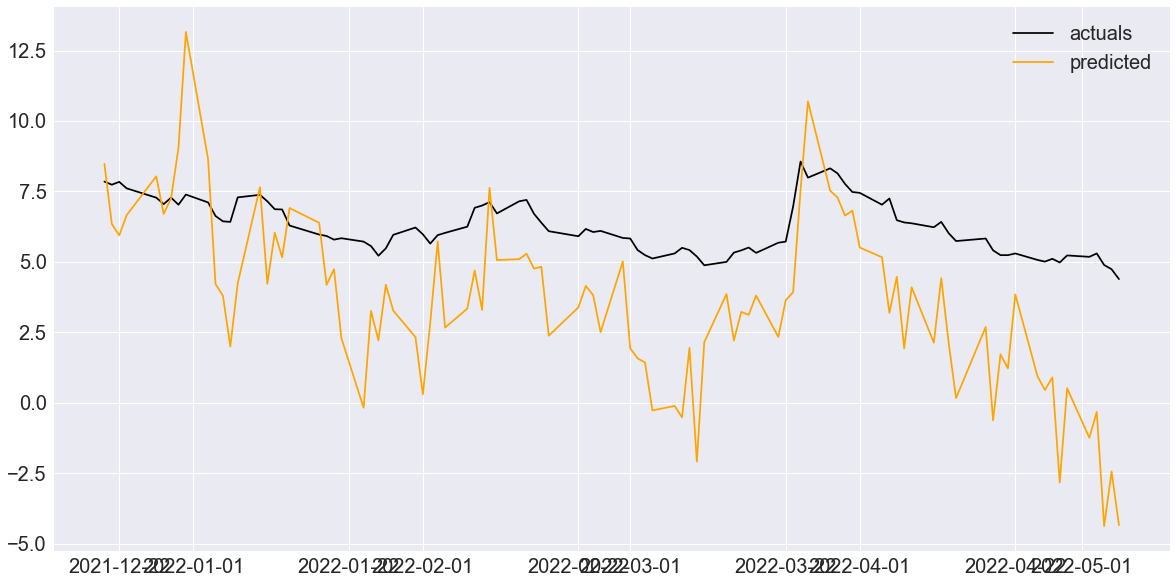

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['tlry_next_close'], color='black')
ax.plot(y_test3['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TLRY target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  26.170000  26.670000  25.350000   
2018-07-20      7   20  2018        3  25.180000  26.000000  24.209999   
2018-07-23      7   23  2018        3  24.430000  26.299999  24.400000   
2018-07-24      7   24  2018        3  26.290001  26.290001  24.360001   
2018-07-25      7   25  2018        3  24.750000  25.860001  24.750000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   
2018-07-24  25.200001     3700000       25.650000       25.680000 -0.449999   
2018-07-25  25.680000     1823300       25.200001       25.139999  0.479999   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   
2018-07-24    -0.017544              25.438             -0.252   
2018-07-25     0.019048              25.252             -0.186   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700              0.152   
2022-05-04     0.100660               5.988              0.288   
2022-05-05    -0.089955               6.112              0.124   
2022-05-06    -0.016474               6.164              0.052   
2022-05-09    -0.070352               6.064             -0.100   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483        0.00       0.000   
2018-07-20               27.709              -0.573        0.00       0.000   
2018-07-23               27.313              -0.396        0.00       0.000   
2018-07-24               26.927              -0.386        0.00       0.000   
2018-07-25               26.536              -0.391        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50       4.750   
2022-05-04                5.736               0.094        4.22       4.414   
2022-05-05                5.768               0.032        4.20       4.250   
2022-05-06                5.808               0.040        3.92       4.340   
2022-05-09                5.806              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

862

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

862
96


In [142]:
X_train4 = train4.drop('tlry_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter  cgc_Open   cgc_High    cgc_Low  \
Date                                                                    
2018-07-19      7   19  2018        3     26.17  26.670000  25.350000   
2018-07-20      7   20  2018        3     25.18  26.000000  24.209999   
2018-07-23      7   23  2018        3     24.43  26.299999  24.400000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483         0.0         0.0   
2018-07-20               27.709              -0.573         0.0         0.0   
2018-07-23               27.313              -0.396         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-07-19        0.0          0.0           0.0               0.0   
2018-07-20        0.0          0.0           0.0               0.0   
2018-07-23        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-07-19               0.0         0.0            0.0                   0.0   
2018-07-20               0.0         0.0            0.0                   0.0   
2018-07-23               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-07-19                  0.0                    0.0                   0.0   
2018-07-20                  0.0                    0.0                   0.0   
2018-07-23                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-07-19       6.76       6.84      6.69        6.83    1175300.0   
2018-07-20       6.79       6.84      6.51        6.54    2019600.0   
2018-07-23       6.50       6.68      6.40        6.46    1930100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-07-19             6.78             6.54       0.05      0.007375   
2018-07-20             6.83             6.46      -0.29     -0.042460   
2018-07-23             6.54             6.27      -0.08     -0.012232   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-07-19                6.864              -0.044                 6.923   
2018-07-20                6.760              -0.104                 6.881   
2018-07-23                6.706              -0.054                 6.832   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-07-19               -0.014         0.0         0.0        0.0   
2018-07-20               -0.042         0.0    

In [143]:
X_train4.shape

(862, 289)

In [144]:
y_train4 = train4['tlry_next_close']
y_train4.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-15    7.88
2021-12-16    7.98
2021-12-17    7.46
Name: tlry_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('tlry_next_close', axis=1)
y_test4 = test4['tlry_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-20     12   20  2021        4     9.052      9.18    8.525       8.75   
2021-12-21     12   21  2021        4     8.860      9.66    8.840       9.66   
2021-12-22     12   22  2021        4     9.340      9.63    9.150       9.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-20     8745300            9.59            9.66     -0.84    -0.087591   
2021-12-21     7112500            8.75            9.37      0.91     0.104000   
2021-12-22     5494400            9.66            9.62     -0.29    -0.030021   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-20               9.180             -0.112                9.655   
2021-12-21               9.282              0.102                9.557   
2021-12-22               9.302              0.020                9.400   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-20              -0.140        6.50       6.700      6.230   
2021-12-21              -0.098        6.30       6.505      6.070   
2021-12-22              -0.157        6.18       6.404      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-20        6.260      981800.0             6.660             6.189   
2021-12-21        6.189     1152300.0             6.260             6.400   
2021-12-22        6.400     1036800.0             6.189             6.640   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-20      -0.400      -0.060060                6.8060   
2021-12-21      -0.071      -0.011342                6.5958   
2021-12-22       0.211       0.034093                6.4758   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-20              -0.1980                 7.2644               -0.1340   
2021-12-21              -0.2102                 7.1079               -0.1565   
2021-12-22              -0.1200                 6.9349               -0.1730   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-20       4.10       4.23     4.020        4.10    2159400.0   
2021-12-21       4.10       4.35     4.080        4.27    2317000.0   
2021-12-22       4.21       4.27     4.142        4.22    1881600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-20             4.31             4.27      -0.21     -0.048724   
2021-12-21             4.10             4.22       0.17      0.041463   
2021-12-22             4.27             4.26      -0.05     -0.011710   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-20                4.118              -0.012                 4.261   
2021-12-21                4.156               0.038                 4.237   
2021-12-22                4.178               0.022                 4.199   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-20               -0.022        8.50        8.64      8.147   
2021-12-21               -0.024        8.11        8.33      8

In [148]:
X_test4.shape

(96, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    4.89
2022-05-05    4.74
2022-05-06    4.39
Name: tlry_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([9.16978808, 6.77312258, 6.18993944, 6.261129  , 8.10467239])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

3.536544913396724


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

2.9415144132568902


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['tlry_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['tlry_next_close'])

In [156]:
y_test4['tlry_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-02             5.18             -1.100765
2022-05-03             5.30             -0.647457
2022-05-04             4.89             -4.582234
2022-05-05             4.74             -2.927579
2022-05-06             4.39             -3.982083

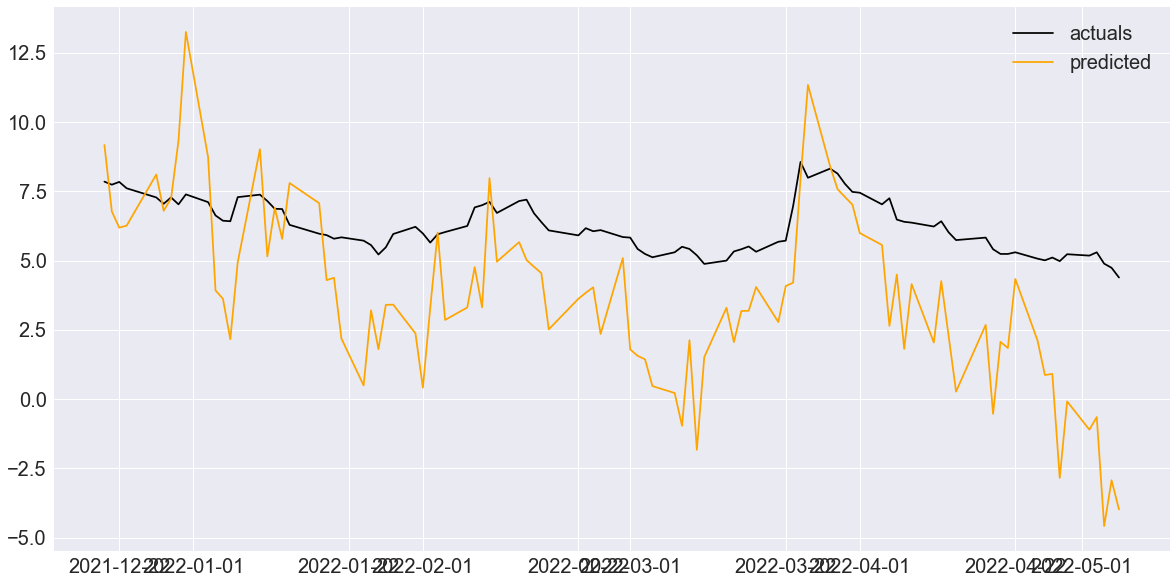

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['tlry_next_close'], color='black')
ax.plot(y_test4['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TLRY target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  26.170000  26.670000  25.350000   
2018-07-20      7   20  2018        3  25.180000  26.000000  24.209999   
2018-07-23      7   23  2018        3  24.430000  26.299999  24.400000   
2018-07-24      7   24  2018        3  26.290001  26.290001  24.360001   
2018-07-25      7   25  2018        3  24.750000  25.860001  24.750000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   
2018-07-24  25.200001     3700000       25.650000       25.680000 -0.449999   
2018-07-25  25.680000     1823300       25.200001       25.139999  0.479999   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   
2018-07-24    -0.017544              25.438             -0.252   
2018-07-25     0.019048              25.252             -0.186   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700              0.152   
2022-05-04     0.100660               5.988              0.288   
2022-05-05    -0.089955               6.112              0.124   
2022-05-06    -0.016474               6.164              0.052   
2022-05-09    -0.070352               6.064             -0.100   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483        0.00       0.000   
2018-07-20               27.709              -0.573        0.00       0.000   
2018-07-23               27.313              -0.396        0.00       0.000   
2018-07-24               26.927              -0.386        0.00       0.000   
2018-07-25               26.536              -0.391        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50       4.750   
2022-05-04                5.736               0.094        4.22       4.414   
2022-05-05                5.768               0.032        4.20       4.250   
2022-05-06                5.808               0.040        3.92       4.340   
2022-05-09                5.806              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

862

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

862
96


In [172]:
X_train5 = train5.drop('tlry_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter  cgc_Open   cgc_High    cgc_Low  \
Date                                                                    
2018-07-19      7   19  2018        3     26.17  26.670000  25.350000   
2018-07-20      7   20  2018        3     25.18  26.000000  24.209999   
2018-07-23      7   23  2018        3     24.43  26.299999  24.400000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483         0.0         0.0   
2018-07-20               27.709              -0.573         0.0         0.0   
2018-07-23               27.313              -0.396         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-07-19        0.0          0.0           0.0               0.0   
2018-07-20        0.0          0.0           0.0               0.0   
2018-07-23        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-07-19               0.0         0.0            0.0                   0.0   
2018-07-20               0.0         0.0            0.0                   0.0   
2018-07-23               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-07-19                  0.0                    0.0                   0.0   
2018-07-20                  0.0                    0.0                   0.0   
2018-07-23                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-07-19       6.76       6.84      6.69        6.83    1175300.0   
2018-07-20       6.79       6.84      6.51        6.54    2019600.0   
2018-07-23       6.50       6.68      6.40        6.46    1930100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-07-19             6.78             6.54       0.05      0.007375   
2018-07-20             6.83             6.46      -0.29     -0.042460   
2018-07-23             6.54             6.27      -0.08     -0.012232   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-07-19                6.864              -0.044                 6.923   
2018-07-20                6.760              -0.104                 6.881   
2018-07-23                6.706              -0.054                 6.832   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-07-19               -0.014         0.0         0.0        0.0   
2018-07-20               -0.042         0.0    

In [173]:
X_train5.shape

(862, 393)

In [174]:
y_train5 = train5['tlry_next_close']
y_train5.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-15    7.88
2021-12-16    7.98
2021-12-17    7.46
Name: tlry_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('tlry_next_close', axis=1)
y_test5 = test5['tlry_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-20     12   20  2021        4     9.052      9.18    8.525       8.75   
2021-12-21     12   21  2021        4     8.860      9.66    8.840       9.66   
2021-12-22     12   22  2021        4     9.340      9.63    9.150       9.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-20     8745300            9.59            9.66     -0.84    -0.087591   
2021-12-21     7112500            8.75            9.37      0.91     0.104000   
2021-12-22     5494400            9.66            9.62     -0.29    -0.030021   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-20               9.180             -0.112                9.655   
2021-12-21               9.282              0.102                9.557   
2021-12-22               9.302              0.020                9.400   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-20              -0.140        6.50       6.700      6.230   
2021-12-21              -0.098        6.30       6.505      6.070   
2021-12-22              -0.157        6.18       6.404      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-20        6.260      981800.0             6.660             6.189   
2021-12-21        6.189     1152300.0             6.260             6.400   
2021-12-22        6.400     1036800.0             6.189             6.640   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-20      -0.400      -0.060060                6.8060   
2021-12-21      -0.071      -0.011342                6.5958   
2021-12-22       0.211       0.034093                6.4758   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-20              -0.1980                 7.2644               -0.1340   
2021-12-21              -0.2102                 7.1079               -0.1565   
2021-12-22              -0.1200                 6.9349               -0.1730   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-20       4.10       4.23     4.020        4.10    2159400.0   
2021-12-21       4.10       4.35     4.080        4.27    2317000.0   
2021-12-22       4.21       4.27     4.142        4.22    1881600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-20             4.31             4.27      -0.21     -0.048724   
2021-12-21             4.10             4.22       0.17      0.041463   
2021-12-22             4.27             4.26      -0.05     -0.011710   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-20                4.118              -0.012                 4.261   
2021-12-21                4.156               0.038                 4.237   
2021-12-22                4.178               0.022                 4.199   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-20               -0.022        8.50        8.64      8.147   
2021-12-21               -0.024        8.11        8.33      8

In [178]:
X_test5.shape

(96, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    4.89
2022-05-05    4.74
2022-05-06    4.39
Name: tlry_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([8.97363242, 6.83533101, 9.67652507, 6.22390941, 7.16250845])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

2.782246533712888


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

2.3153323650732425


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['tlry_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['tlry_next_close'])

In [186]:
y_test5['tlry_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-02             5.18              2.359193
2022-05-03             5.30              2.256852
2022-05-04             4.89             -1.804799
2022-05-05             4.74              0.310945
2022-05-06             4.39             -2.293215

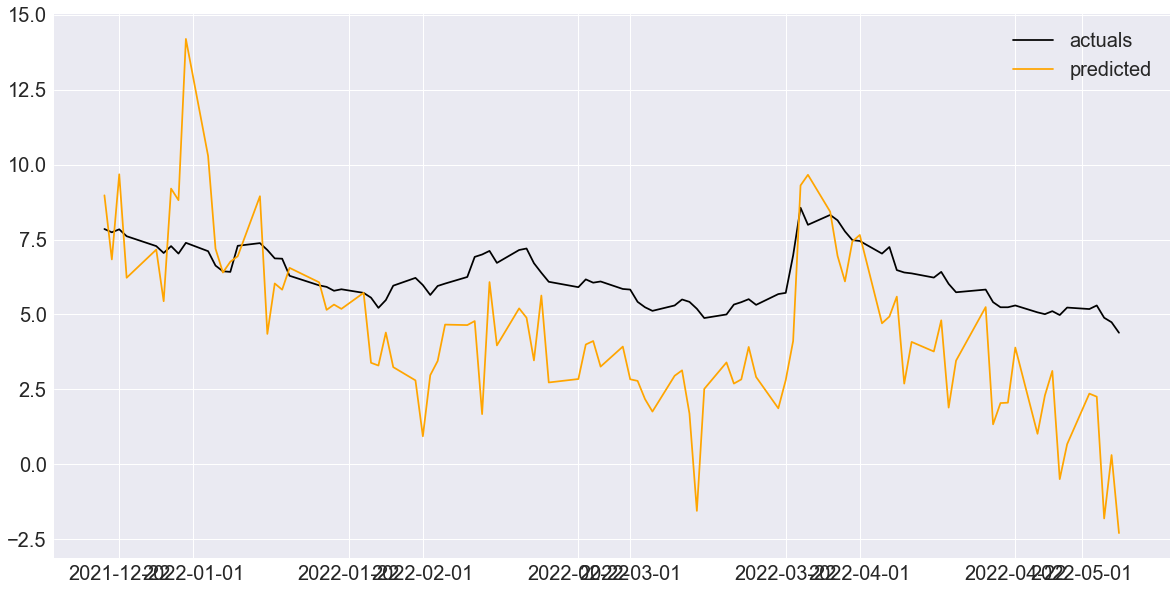

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['tlry_next_close'], color='black')
ax.plot(y_test5['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TLRY target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-07-19      7   19  2018        3  26.170000  26.670000  25.350000   
2018-07-20      7   20  2018        3  25.180000  26.000000  24.209999   
2018-07-23      7   23  2018        3  24.430000  26.299999  24.400000   
2018-07-24      7   24  2018        3  26.290001  26.290001  24.360001   
2018-07-25      7   25  2018        3  24.750000  25.860001  24.750000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   
2018-07-24  25.200001     3700000       25.650000       25.680000 -0.449999   
2018-07-25  25.680000     1823300       25.200001       25.139999  0.479999   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   
2018-07-24    -0.017544              25.438             -0.252   
2018-07-25     0.019048              25.252             -0.186   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700              0.152   
2022-05-04     0.100660               5.988              0.288   
2022-05-05    -0.089955               6.112              0.124   
2022-05-06    -0.016474               6.164              0.052   
2022-05-09    -0.070352               6.064             -0.100   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483        0.00       0.000   
2018-07-20               27.709              -0.573        0.00       0.000   
2018-07-23               27.313              -0.396        0.00       0.000   
2018-07-24               26.927              -0.386        0.00       0.000   
2018-07-25               26.536              -0.391        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50       4.750   
2022-05-04                5.736               0.094        4.22       4.414   
2022-05-05                5.768               0.032        4.20       4.250   
2022-05-06                5.808               0.040        3.92       4.340   
2022-05-09                5.806              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

862

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

862
96


In [202]:
X_train6 = train6.drop('tlry_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter  cgc_Open   cgc_High    cgc_Low  \
Date                                                                    
2018-07-19      7   19  2018        3     26.17  26.670000  25.350000   
2018-07-20      7   20  2018        3     25.18  26.000000  24.209999   
2018-07-23      7   23  2018        3     24.43  26.299999  24.400000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-07-19  25.420000     2942200       26.610001       24.309999 -1.190001   
2018-07-20  24.309999     4745900       25.420000       25.650000 -1.110001   
2018-07-23  25.650000     4113500       24.309999       25.200001  1.340001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-07-19    -0.044720              26.986             -0.834   
2018-07-20    -0.043666              26.082             -0.904   
2018-07-23     0.055121              25.690             -0.392   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-07-19               28.282              -0.483         0.0         0.0   
2018-07-20               27.709              -0.573         0.0         0.0   
2018-07-23               27.313              -0.396         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-07-19        0.0          0.0           0.0               0.0   
2018-07-20        0.0          0.0           0.0               0.0   
2018-07-23        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-07-19               0.0         0.0            0.0                   0.0   
2018-07-20               0.0         0.0            0.0                   0.0   
2018-07-23               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-07-19                  0.0                    0.0                   0.0   
2018-07-20                  0.0                    0.0                   0.0   
2018-07-23                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-07-19       6.76       6.84      6.69        6.83    1175300.0   
2018-07-20       6.79       6.84      6.51        6.54    2019600.0   
2018-07-23       6.50       6.68      6.40        6.46    1930100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-07-19             6.78             6.54       0.05      0.007375   
2018-07-20             6.83             6.46      -0.29     -0.042460   
2018-07-23             6.54             6.27      -0.08     -0.012232   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-07-19                6.864              -0.044                 6.923   
2018-07-20                6.760              -0.104                 6.881   
2018-07-23                6.706              -0.054                 6.832   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-07-19               -0.014         0.0         0.0        0.0   
2018-07-20               -0.042         0.0    

In [203]:
X_train6.shape

(862, 419)

In [204]:
y_train6 = train6['tlry_next_close']
y_train6.head(3)

Date
2018-07-19    29.770000
2018-07-20    29.450001
2018-07-23    25.360001
Name: tlry_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-15    7.88
2021-12-16    7.98
2021-12-17    7.46
Name: tlry_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('tlry_next_close', axis=1)
y_test6 = test6['tlry_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-20     12   20  2021        4     9.052      9.18    8.525       8.75   
2021-12-21     12   21  2021        4     8.860      9.66    8.840       9.66   
2021-12-22     12   22  2021        4     9.340      9.63    9.150       9.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-20     8745300            9.59            9.66     -0.84    -0.087591   
2021-12-21     7112500            8.75            9.37      0.91     0.104000   
2021-12-22     5494400            9.66            9.62     -0.29    -0.030021   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-20               9.180             -0.112                9.655   
2021-12-21               9.282              0.102                9.557   
2021-12-22               9.302              0.020                9.400   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-20              -0.140        6.50       6.700      6.230   
2021-12-21              -0.098        6.30       6.505      6.070   
2021-12-22              -0.157        6.18       6.404      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-20        6.260      981800.0             6.660             6.189   
2021-12-21        6.189     1152300.0             6.260             6.400   
2021-12-22        6.400     1036800.0             6.189             6.640   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-20      -0.400      -0.060060                6.8060   
2021-12-21      -0.071      -0.011342                6.5958   
2021-12-22       0.211       0.034093                6.4758   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-20              -0.1980                 7.2644               -0.1340   
2021-12-21              -0.2102                 7.1079               -0.1565   
2021-12-22              -0.1200                 6.9349               -0.1730   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-20       4.10       4.23     4.020        4.10    2159400.0   
2021-12-21       4.10       4.35     4.080        4.27    2317000.0   
2021-12-22       4.21       4.27     4.142        4.22    1881600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-20             4.31             4.27      -0.21     -0.048724   
2021-12-21             4.10             4.22       0.17      0.041463   
2021-12-22             4.27             4.26      -0.05     -0.011710   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-20                4.118              -0.012                 4.261   
2021-12-21                4.156               0.038                 4.237   
2021-12-22                4.178               0.022                 4.199   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-20               -0.022        8.50        8.64      8.147   
2021-12-21               -0.024        8.11        8.33      8

In [208]:
X_test6.shape

(96, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    4.89
2022-05-05    4.74
2022-05-06    4.39
Name: tlry_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([9.37832049, 6.28744598, 8.68975641, 5.24509364, 6.67656766])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

3.171518086124507


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

2.724669335001819


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['tlry_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['tlry_next_close'])

In [216]:
y_test6['tlry_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

tlry_next_close  tlry_pred_next_close
Date                                             
2022-05-02             5.18              2.304614
2022-05-03             5.30              0.899269
2022-05-04             4.89             -2.196413
2022-05-05             4.74             -0.310917
2022-05-06             4.39             -2.197428

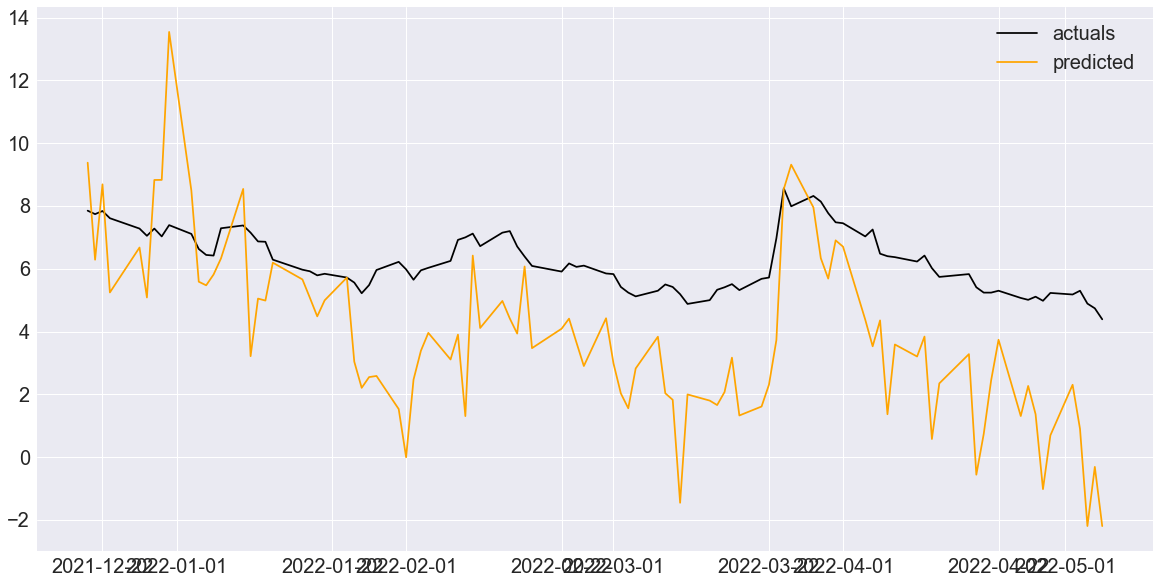

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['tlry_next_close'], color='black')
ax.plot(y_test6['tlry_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
0         1+Dow  LinearRegression()  1.197681  0.953954   958         862   
2    1+ETFs+Dow  LinearRegression()  1.699378  1.480530   958         862   
1        1+ETFs  LinearRegression()  1.960322  1.719779   958         862   
5      All+ETFs  LinearRegression()  2.782247  2.315332   958         862   
6  All+ETFs+Dow  LinearRegression()  3.171518  2.724669   958         862   
4       All+Dow  LinearRegression()  3.536545  2.941514   958         862   
3    All stocks  LinearRegression()  3.570031  2.982146   958         862   

   test_rows  columns  
0         96       56  
2         96      186  
1         96      160  
5         96      394  
6         96      420  
4         96      290  
3         96      264

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)